### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Filtering data of India, China, and Bangladesh

In [2]:
!python filterdata.py

### Data exploration and preprocessing

In [2]:
data=pd.read_csv('input.csv')

In [3]:
data=data[data['iso_code']=='BGD']

In [4]:
data.shape

(810, 67)

In [5]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

1) Dropping continent and location as they give no information

In [6]:
data=data.drop(['continent','location'],axis=1)

2) Dropping the columns with all NaN values

In [7]:
p=data.isna().all()
null_cols=p[p==True].index.to_list()
null_cols

['icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']

In [8]:
data=data.drop(null_cols,axis=1)

3) Dropping the columns with all same values for each country

In [6]:
p=data.groupby(['iso_code']).nunique()
p

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
BGD,1,1,810,799,706,786,724,142,387,799,...,1,1,1,1,1,1,0,0,0,0
CHN,1,1,856,856,296,568,124,57,101,856,...,1,1,0,1,1,1,0,0,0,0
IND,1,1,848,815,801,817,794,565,759,813,...,1,1,1,1,1,1,0,0,0,0


In [9]:
x=p.sum()
same_valued_cols=x[x<=3].index.to_list()
same_valued_cols

['continent',
 'location',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'tests_units',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index',
 'excess_mortality_cumulative_absolute',
 'excess_mortality_cumulative',
 'excess_mortality',
 'excess_mortality_cumulative_per_million']

In [15]:
data=data.drop(same_valued_cols,axis=1)

4) Dropping the columns with high correlation with other columns

In [16]:
similar_cols=[[col[:(col.find('_per_million'))^(col.find('_per_thousand'))^(col.find('_per_hundred'))],col] for col in data if((col.find('_per_million')!=-1)|(col.find('_per_thousand')!=-1)|(col.find('_per_hundred')!=-1))]
similar_cols

[['total_cases', 'total_cases_per_million'],
 ['new_cases', 'new_cases_per_million'],
 ['new_cases_smoothed', 'new_cases_smoothed_per_million'],
 ['total_deaths', 'total_deaths_per_million'],
 ['new_deaths', 'new_deaths_per_million'],
 ['new_deaths_smoothed', 'new_deaths_smoothed_per_million'],
 ['total_tests', 'total_tests_per_thousand'],
 ['new_tests', 'new_tests_per_thousand'],
 ['new_tests_smoothed', 'new_tests_smoothed_per_thousand'],
 ['total_vaccinations', 'total_vaccinations_per_hundred'],
 ['people_vaccinated', 'people_vaccinated_per_hundred'],
 ['people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'],
 ['total_boosters', 'total_boosters_per_hundred'],
 ['new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million'],
 ['new_people_vaccinated_smoothed',
  'new_people_vaccinated_smoothed_per_hundred']]

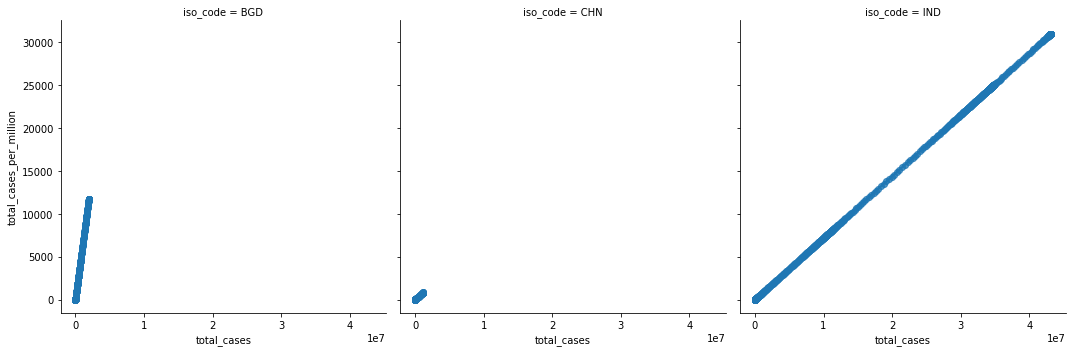

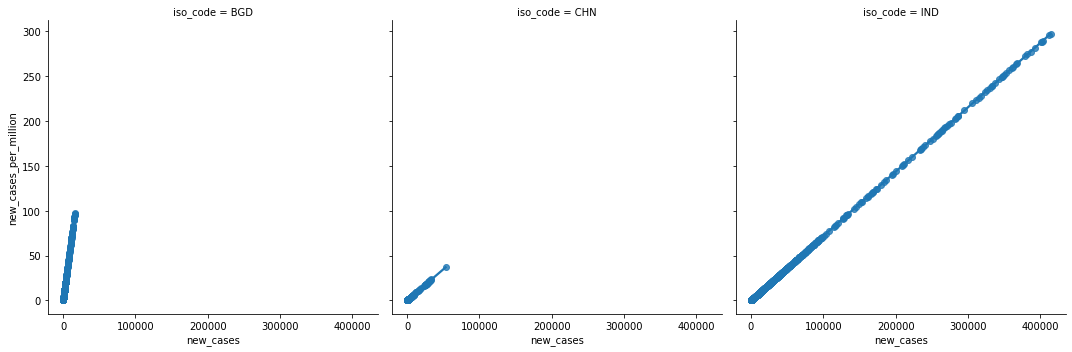

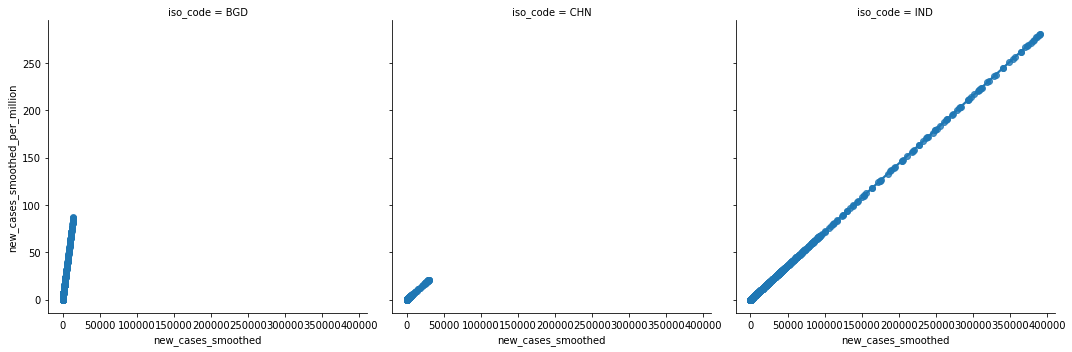

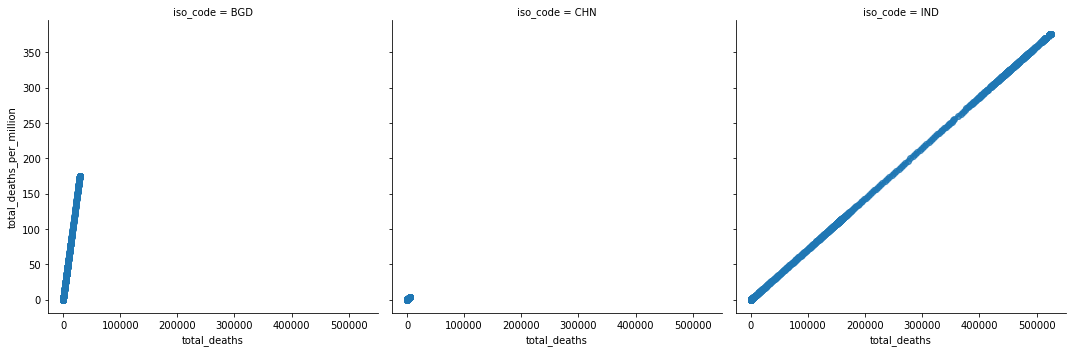

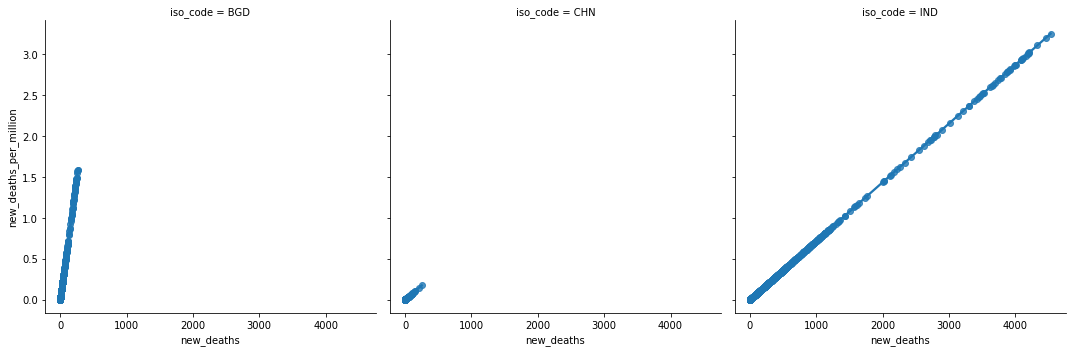

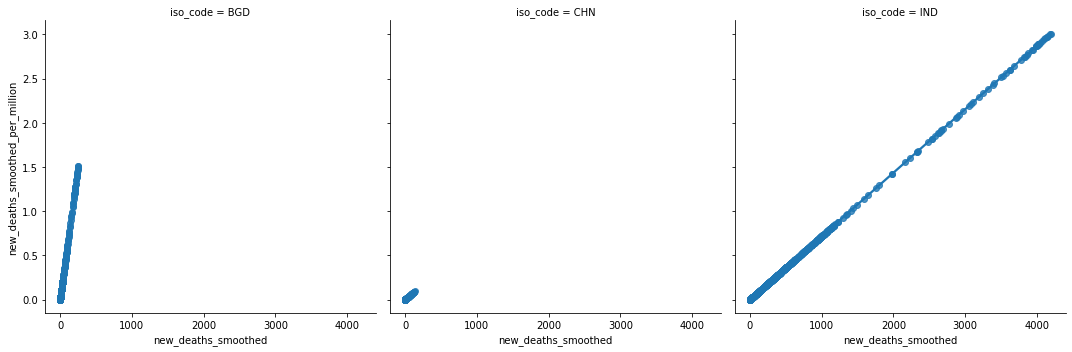

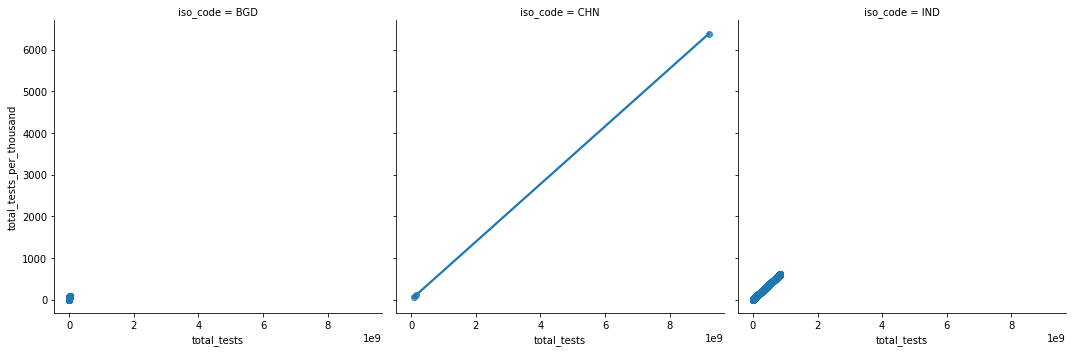

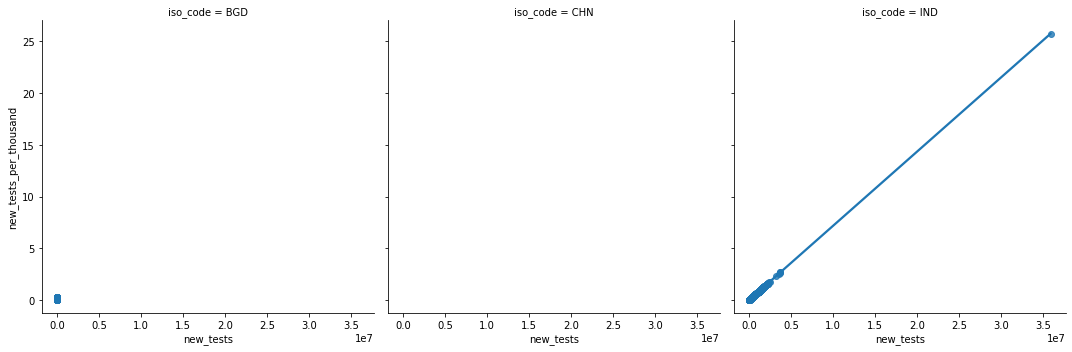

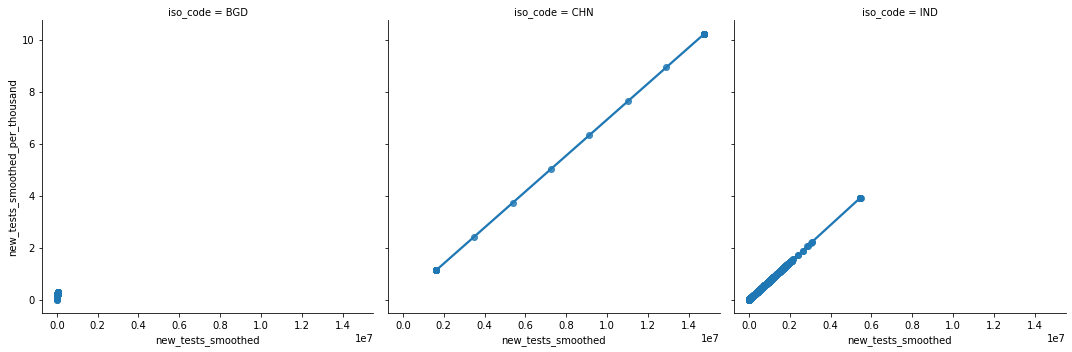

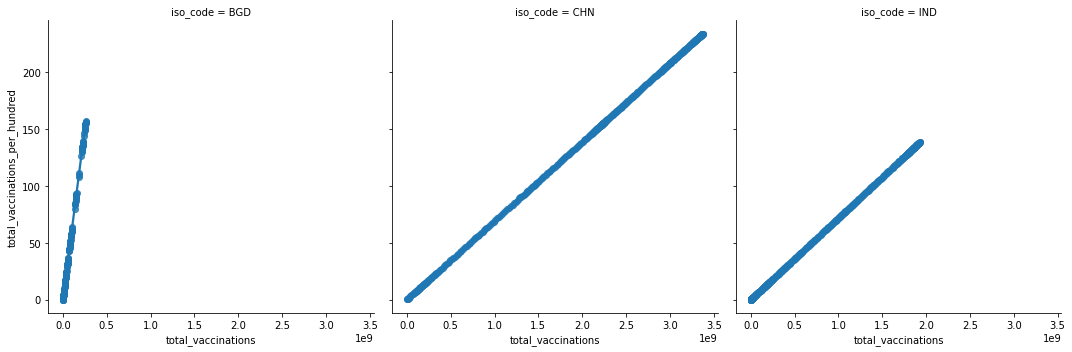

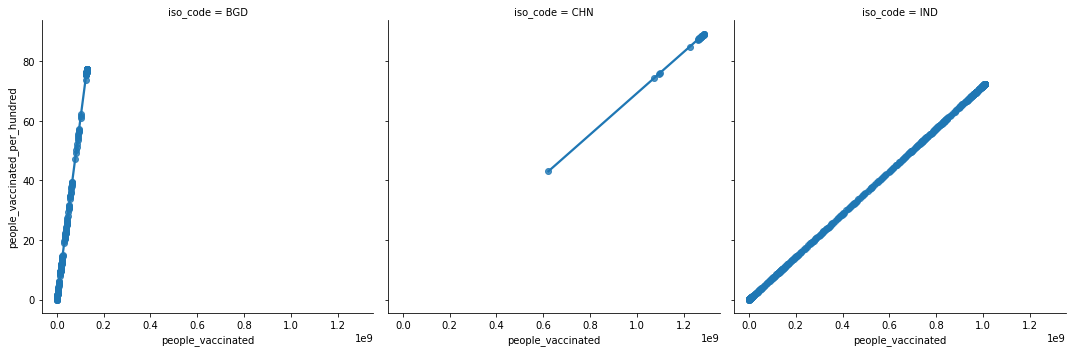

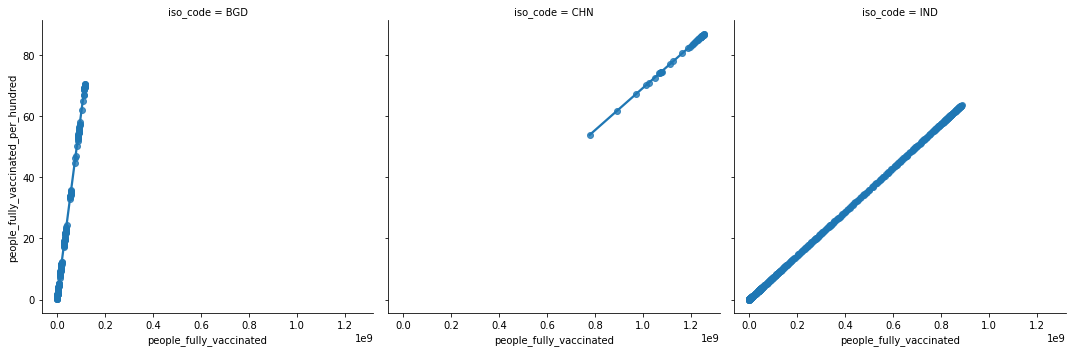

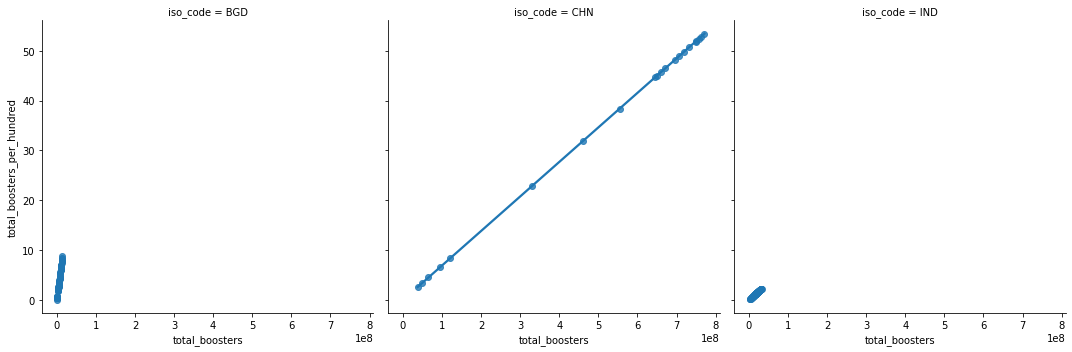

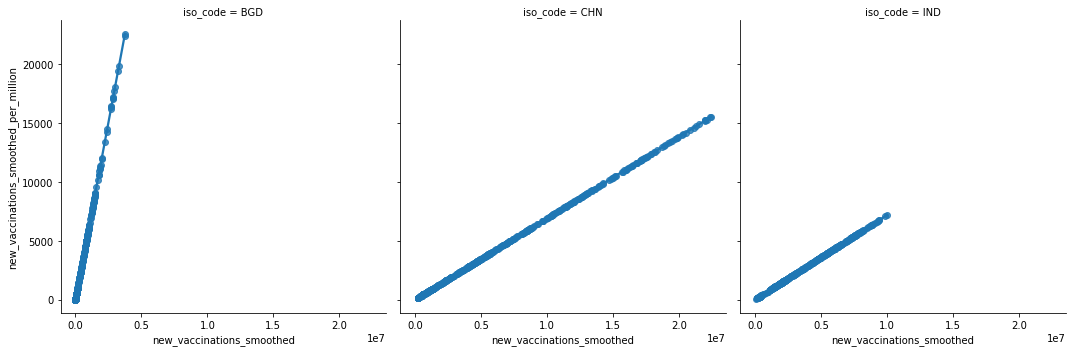

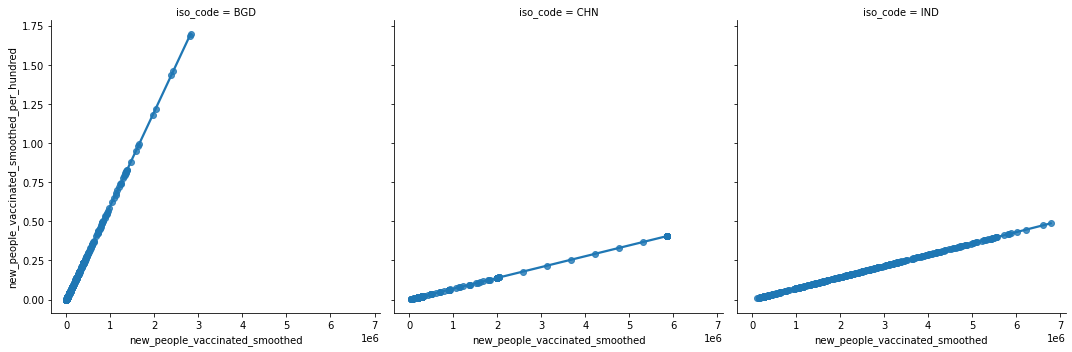

In [56]:
for x,y in similar_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

In [17]:
data.drop([i[1] for i in similar_cols],axis=1,inplace=True)

5) Checking if a column and its smoothed values are correlated

In [18]:
smoothed_cols=[[col[:(col.find('_smoothed'))],col] for col in data if((col.find('_smoothed')!=-1)&(col[:(col.find('_smoothed'))] in data))]
smoothed_cols

[['new_cases', 'new_cases_smoothed'],
 ['new_deaths', 'new_deaths_smoothed'],
 ['new_tests', 'new_tests_smoothed'],
 ['new_vaccinations', 'new_vaccinations_smoothed']]

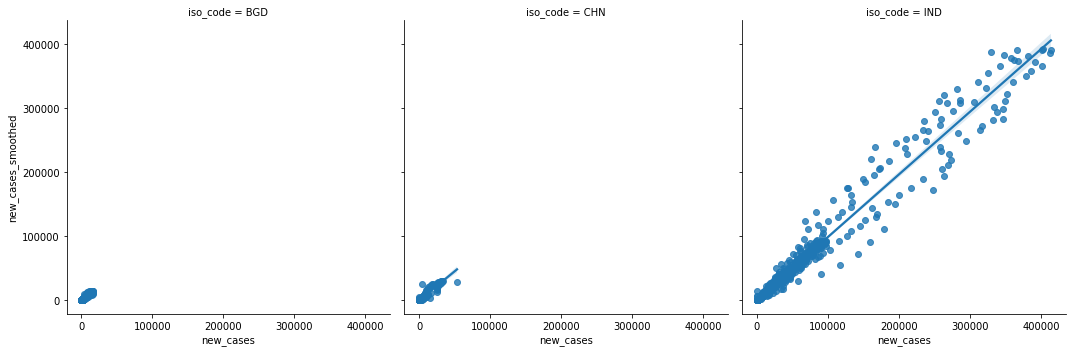

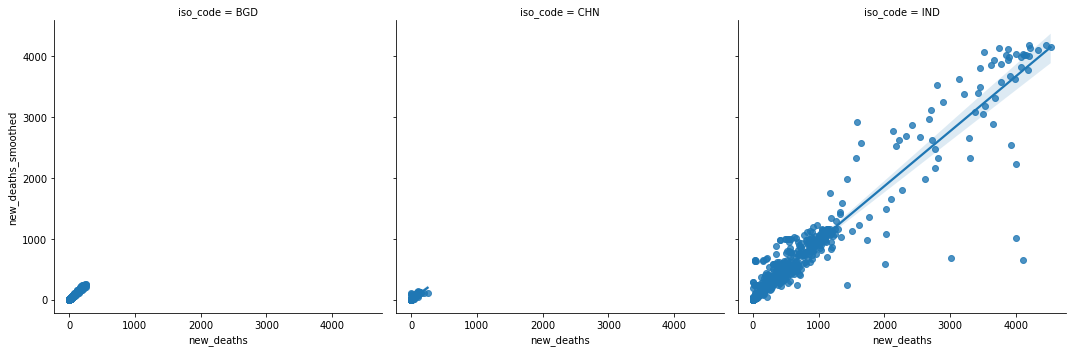

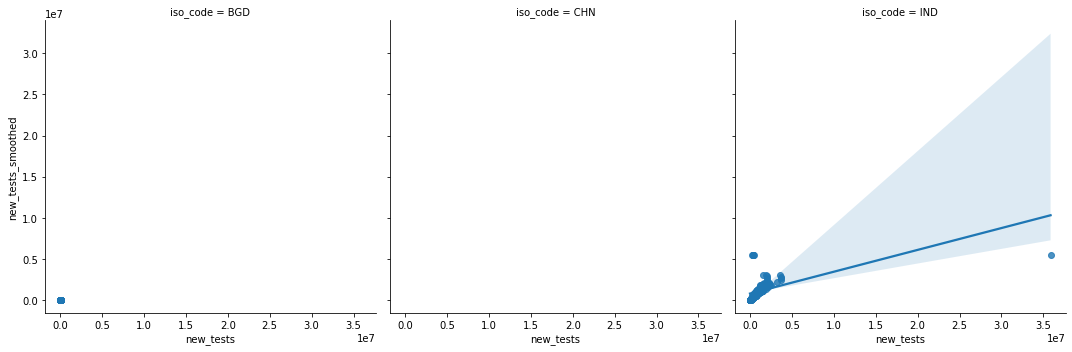

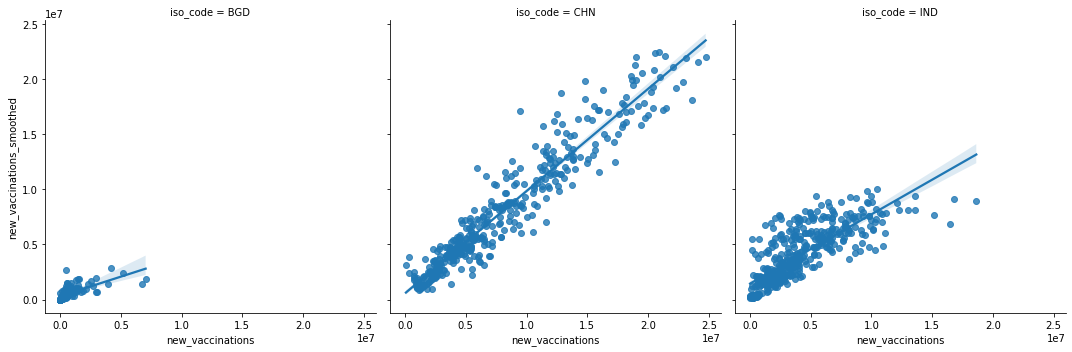

In [59]:
for x,y in smoothed_cols:
    sns.lmplot(x=x,y=y,data=data,col='iso_code')

6) *Total* columns are cumulative sum of their corresponding *new* columns (e.g. total_cases and new_cases). Filling *new* columns using *total* columns and dropping *total* columns.

In [19]:
total_and_new=list({col[6:] for col in data if(col.find('total_')!=-1)}.intersection({col[4:] for col in data if(col.find('new_')!=-1)}))
total_and_new

['vaccinations', 'tests', 'deaths', 'cases']

In [20]:
p=data.groupby(['iso_code'])

In [21]:
for i in total_and_new:
    print(((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum(),((data['total_'+i]-p['total_'+i].shift(1))==data['new_'+i]).sum()+data['new_'+i].isna().sum(),data['new_'+i].isna().sum(),data['total_'+i].isna().sum())

1061 2514 1453 1329
1478 2493 1015 997
2455 2512 57 51
2509 2512 3 0


In [22]:
for i in total_and_new:
    data['new_'+i].fillna(data['total_'+i]-p['total_'+i].shift(1),inplace=True)

In [23]:
data.drop(['total_'+col for col in total_and_new],axis=1,inplace=True)

7) Dropping columns with many missing values

In [24]:
p=data.isna().sum()
p

iso_code                             0
date                                 0
new_cases                            1
new_cases_smoothed                  23
new_deaths                          52
new_deaths_smoothed                 72
reproduction_rate                   97
new_tests                         1015
new_tests_smoothed                 290
positive_rate                      299
tests_per_case                     299
tests_units                        269
people_vaccinated                 1744
people_fully_vaccinated           1798
total_boosters                    2312
new_vaccinations                  1453
new_vaccinations_smoothed         1009
new_people_vaccinated_smoothed    1189
stringency_index                    44
dtype: int64

In [25]:
majority_null_cols=p[p>1100].index.to_list()+['new_vaccinations_smoothed']
majority_null_cols

['people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_people_vaccinated_smoothed',
 'new_vaccinations_smoothed']

In [26]:
data=data.drop(majority_null_cols,axis=1)

8) Checking number of missing values in each column by country

In [27]:
p=data.isna().sum()
(pd.concat([data['iso_code'],data[p[p>200].index.to_list()].isna()],axis=1)).groupby(['iso_code']).sum()

,new_tests,new_tests_smoothed,positive_rate,tests_per_case,tests_units
iso_code,,,,,
BGD,79,33,34,34,26
CHN,856,206,206,206,199
IND,80,51,59,59,44


9) Correlation matrix

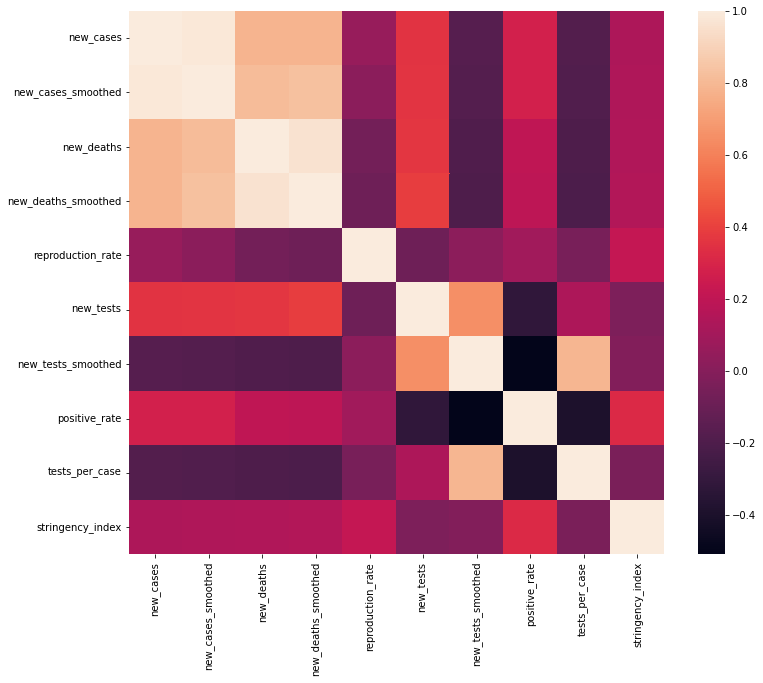

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())

10) Dropping *new_cases_smoothed* column as it is highly correlated with *new_cases* column

In [28]:
data.drop(['new_cases_smoothed'],inplace=True,axis=1)

11) Extracting date, month and year from *date* column

In [29]:
data.date=pd.to_datetime(data.date)

In [30]:
final_data=data.drop(['date'],axis=1)
final_data['day']=data.date.dt.day
final_data['month']=data.date.dt.month
final_data['year']=data.date.dt.year

12) Removing rows with no target variable (*new_cases*)

In [31]:
final_data=final_data[final_data['new_cases'].isna()==False]

13) One-hot encoding string columns

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
objects=['iso_code','tests_units']
encodings=[]
for col in objects:
    encoding=OneHotEncoder(sparse=False).fit_transform(data[col].to_numpy().reshape(-1, 1))
    colnames=final_data[col].unique()
    encodings.append(pd.DataFrame(encoding,columns=colnames))
final_data=final_data.drop(objects,axis=1)
encodings=pd.concat(encodings,axis=1)
final_data=pd.concat([final_data,encodings],axis=1)

In [35]:
final_data

,new_cases,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,8.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,9.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,10.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,11.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,12.0,3.0,2020.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2022.0,46.0,31.143,NaN,442681.0,430637.0,0.0048,206.6,NaN,22.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2510,1675.0,31.0,32.857,NaN,294812.0,422581.0,0.0050,201.3,NaN,23.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2511,2124.0,17.0,30.571,NaN,407626.0,429745.0,0.0050,200.6,NaN,24.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0
2512,2628.0,18.0,31.714,NaN,458924.0,433168.0,0.0050,198.7,NaN,25.0,5.0,2022.0,0.0,0.0,1.0,1.0,0.0,0.0


### Model training

In [36]:
!pip install xgboost

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

1) XGBoost model

In [38]:
cols=final_data.columns
final_data=IterativeImputer().fit_transform(final_data)
final_data=pd.DataFrame(final_data,columns=cols)

c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [39]:
y=final_data['new_cases']
X=final_data.drop(['new_cases'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
params_xgb={
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.4,0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'n_estimators': [100,500,1000,1500,2000]
        }

In [42]:
xgb=RandomizedSearchCV(XGBRegressor(),params_xgb,random_state=0)
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.9917888923797297

In [43]:
xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 1000,
 'min_child_weight': 10,
 'gamma': 1,
 'colsample_bytree': 0.8}

2) Linear regression model

In [44]:
cols=data.columns
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [45]:
lr=LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7157136230352104

3) Ridge regression model

In [46]:
params_ridge={
        'alpha': [0.1,1,10,100,1000]
        }

In [47]:
ridge=RandomizedSearchCV(Ridge(),params_ridge,random_state=0)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


0.7148439338070083

In [48]:
ridge.best_params_

{'alpha': 100}

4) ARIMA model to predict features 

In [49]:
!pip install pmdarima

In [50]:
import pmdarima as pm

In [51]:
import os
import joblib

In [52]:
BGD=final_data[final_data['BGD']==1]
CHN=final_data[final_data['CHN']==1]
IND=final_data[final_data['IND']==1]

In [53]:
cols=['new_deaths','new_deaths_smoothed','reproduction_rate','new_tests','new_tests_smoothed','positive_rate','tests_per_case','stringency_index','tests performed','samples tested']
folder='models/'
models={}
if (os.path.exists(folder)==False):
  for col in cols:
    d_BGD=BGD[col]
    d_CHN=CHN[col]
    d_IND=IND[col]
    BGD_model=pm.auto_arima(y=d_BGD,m=1)
    CHN_model=pm.auto_arima(y=d_CHN,m=1)
    IND_model=pm.auto_arima(y=d_IND,m=1)
    models[col]={'BGD':BGD_model,'CHN':CHN_model,'IND':IND_model}
  os.mkdir(folder)
  for col,models_ in models.items():
    file_name_pfx=col+'_'
    for country,model in models_.items():
      file_name=file_name_pfx+country+'.pkl'
      file_path=folder+file_name
      joblib.dump(model, file_path)
else:
  for file_name in os.listdir(folder):
    p=file_name[:-4]
    country=p[-3:]
    feature=p[:-4]
    if feature in models:
      models[feature][country]=joblib.load(folder+file_name)
    else:
      models[feature]={country:joblib.load(folder+file_name)}

c:\Users\somagani\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,1,1)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\somagani\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\somagani\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\somagani\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "c:\Users\somagani\Anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "c:\Users\somagani\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "c:\Users\somagani\Anaconda3\li

### Generating features from ARIMA model

In [54]:
start=pd.to_datetime('26-05-2022')
end=pd.to_datetime('26-08-2022')

In [55]:
feats_to_gen=(end-start).days+1

In [56]:
dates=pd.date_range(start,end).to_series()

In [57]:
features=[]
for col in cols:
  d_BGD=pd.Series(models[col]['BGD'].predict(feats_to_gen),name=col)
  d_CHN=pd.Series(models[col]['CHN'].predict(feats_to_gen),name=col)
  d_IND=pd.Series(models[col]['IND'].predict(feats_to_gen),name=col)
  d=[d_BGD,d_CHN,d_IND]
  features.append(d)
features.append([dates.dt.day.rename('day'),dates.dt.day.rename('day'),dates.dt.day.rename('day')])
features.append([dates.dt.month.rename('month'),dates.dt.month.rename('month'),dates.dt.month.rename('month')])
features.append([dates.dt.year.rename('year'),dates.dt.year.rename('year'),dates.dt.year.rename('year')])
features.append([pd.Series([1 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD'),pd.Series([0 for i in range(feats_to_gen)],name='BGD')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='CHN'),pd.Series([1 for i in range(feats_to_gen)],name='CHN'),pd.Series([0 for i in range(feats_to_gen)],name='CHN')])
features.append([pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([0 for i in range(feats_to_gen)],name='IND'),pd.Series([1 for i in range(feats_to_gen)],name='IND')])

In [58]:
for i in range(len(features)):
  features[i]=pd.concat(features[i],axis=0).reset_index().drop('index',axis=1)

In [59]:
features=pd.concat(features,axis=1)
features['NaN']=0

In [60]:
c=['tests performed','samples tested']
to_move=features[c]
features.drop(c,axis=1,inplace=True)
features=pd.concat([features,to_move],axis=1)

In [61]:
features

,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,new_tests_smoothed,positive_rate,tests_per_case,stringency_index,day,month,year,BGD,CHN,IND,NaN,tests performed,samples tested
0,0.323737,0.458454,0.874024,3710.626454,1.193000e+03,0.098320,-3.508556,55.040688,26,5,2022,1,0,0,0,1.0,0.000000
1,0.264117,0.536485,0.878307,3453.735331,1.193000e+03,0.112382,-3.508556,55.040688,27,5,2022,1,0,0,0,1.0,0.000000
2,0.273569,0.552465,0.880076,3988.843502,1.193000e+03,0.125415,-3.508556,55.040688,28,5,2022,1,0,0,0,1.0,0.000000
3,0.423069,0.547821,0.881069,4251.818258,1.193000e+03,0.137492,-3.508556,55.040688,29,5,2022,1,0,0,0,1.0,0.000000
4,0.398192,0.566050,0.881542,4370.470004,1.193000e+03,0.148685,-3.508556,55.040688,30,5,2022,1,0,0,0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,11.137059,46.050471,-0.798247,684534.202681,1.558867e+06,-0.582369,10892.147991,-96.813700,22,8,2022,0,0,1,0,0.0,26.274862
275,11.133911,46.050995,-0.798247,684534.202681,1.549653e+06,-0.583335,10892.147991,-97.500605,23,8,2022,0,0,1,0,0.0,26.561508
276,11.130944,46.051475,-0.798247,684534.202681,1.540660e+06,-0.584287,10892.147991,-98.724860,24,8,2022,0,0,1,0,0.0,26.848154
277,11.128147,46.051916,-0.798247,684534.202681,1.531879e+06,-0.585226,10892.147991,-99.237876,25,8,2022,0,0,1,0,0.0,27.134799


### Results

In [62]:
result_xgb=xgb.predict(features)
result_lr=lr.predict(features)
result_ridge=ridge.predict(features)

c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\somagani\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [63]:
result_xgb.reshape(-1,3),result_lr.reshape(-1,3),result_ridge.reshape(-1,3)

(array([[  -37.691917,   -62.213196,  -232.07544 ],
        [  182.67148 ,   156.43369 , -1109.6523  ],
        [ 1069.1664  ,   165.3347  ,  1107.9794  ],
        [  973.19635 ,   785.45905 ,   934.3991  ],
        [ 1119.8066  ,  1636.2688  ,   528.5826  ],
        [  408.16794 ,   420.5376  ,   240.39098 ],
        [ -117.39498 ,  2949.3225  ,  4100.035   ],
        [ 4036.2554  ,  4099.972   ,  3827.2493  ],
        [ 4050.3623  ,  4074.5637  ,  3978.3196  ],
        [ 3897.8167  ,  4030.7341  ,  3916.5833  ],
        [ 3784.8157  ,  3868.767   ,  3852.8164  ],
        [ 3930.0476  ,  3873.472   ,  3800.1238  ],
        [ 4377.5894  ,  4589.3384  ,  4924.585   ],
        [ 4783.406   ,  4856.029   ,  4580.757   ],
        [ 4453.9     ,  4624.424   ,  4490.883   ],
        [ 4503.555   ,  4569.4517  ,  4455.7764  ],
        [ 4157.8     ,  3870.0098  ,  3935.5735  ],
        [ 3907.5513  ,  4105.477   ,  4027.6562  ],
        [ 4079.297   ,  4131.8955  ,  3789.3079  ],
        [ 37